# Analysis of Simulation Results 

In [1]:
import numpy as np
import pandas as pd

margin_results = np.load("results/margin_results4.npy")
random_results = np.load("results/random_results4.npy")
entropy_results = np.load("results/entropy_results4.npy")

margin_inclass = np.load("results/margin_results4_accuracy.npy")
random_inclass = np.load("results/random_results4_accuracy.npy")
entropy_inclass = np.load("results/entropy_results4_accuracy.npy")

n_queries = 40

In [2]:

random_inclass.mean(axis=(0, 1))


array([0.15811317, 0.31359946, 0.28459562, 0.24302572, 0.37442863])

Text(0, 0.5, 'Accuracy')

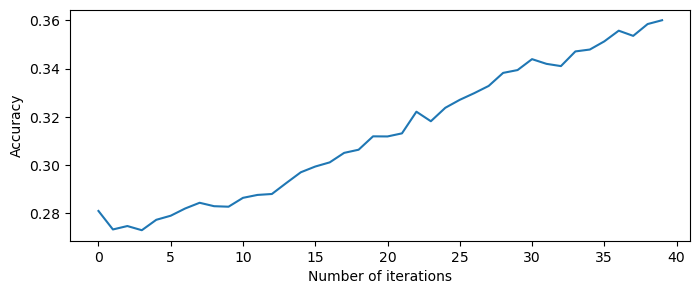

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 3)
plt.plot(margin_results[0].mean(axis=0))
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

In [4]:
random_inclass.shape

(60, 40, 5)

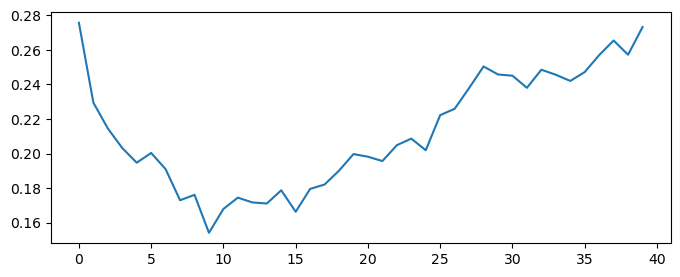

In [5]:
plt.plot(margin_inclass[:,:, 4].mean(axis=0))

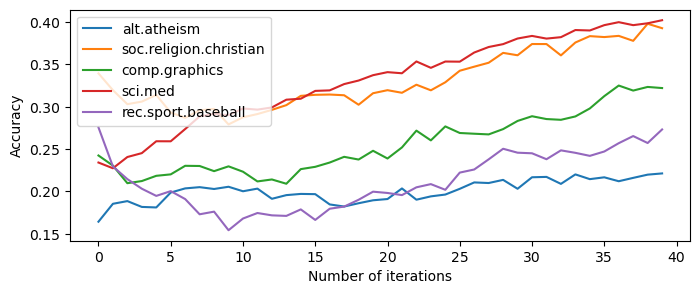

In [6]:
import matplotlib.pyplot as plt

categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med', 'rec.sport.baseball']

plt.rcParams["figure.figsize"] = (8, 3)
plt.plot(margin_inclass.mean(axis=0), label=categories) #
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')

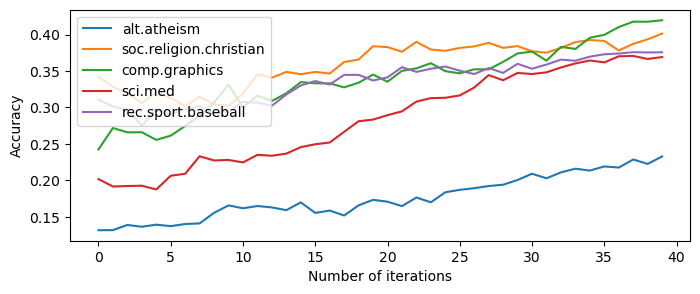

In [7]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med', 'rec.sport.baseball']

plt.rcParams["figure.figsize"] = (8, 3)
plt.plot(entropy_inclass.mean(axis=0), label=categories)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')

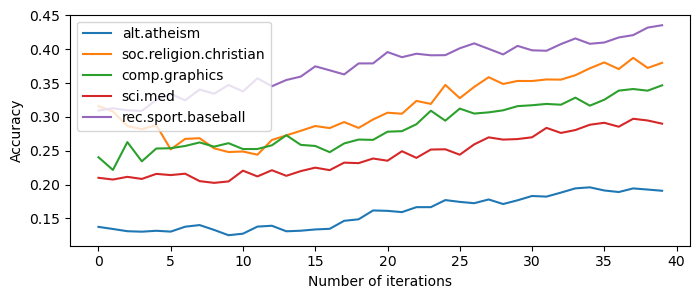

In [8]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med', 'rec.sport.baseball']

plt.rcParams["figure.figsize"] = (8, 3)
plt.plot(random_inclass.mean(axis=0), label=categories)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')

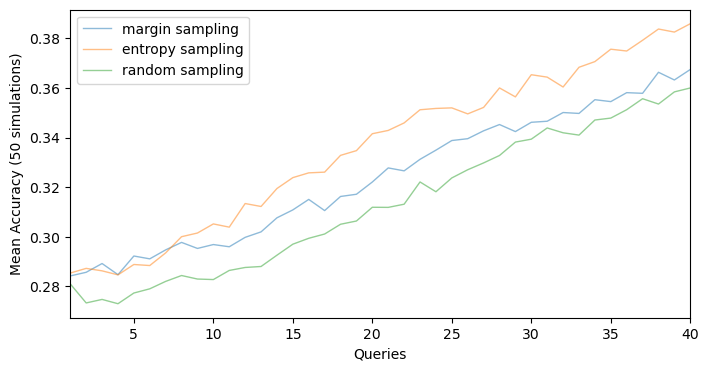

In [9]:
plt.rcParams["figure.figsize"] = (8, 4)
x_queries = np.arange(1, n_queries+1)
f1, ax = plt.subplots(1, 1)

methods = [margin_results,  entropy_results, random_results]
method_names = ["margin sampling", "entropy sampling", "random sampling",]

ax.plot(x_queries, random_results[0].mean(axis=0), label="margin sampling", alpha=0.5, lw=1)
ax.plot(x_queries, entropy_results[0].mean(axis=0), label="entropy sampling", alpha=0.5, lw=1)
ax.plot(x_queries, margin_results[0].mean(axis=0), label="random sampling", alpha=0.5, lw=1)
ax.set_ylabel('Mean Accuracy (50 simulations)')
ax.legend(loc='upper left')
ax.set_xlim(1, n_queries)
ax.set_xlabel("Queries")

plt.savefig('foo.png')

In [11]:
# idx = 0
# for method in methods:
#     baseball_p = (np.cumsum(np.mean(method[1]==0, axis=0)))  / x_queries
#     ax[1].plot(x_queries, baseball_p, label=method_names[idx], alpha=0.5)
#     idx+=1
# ax[1].legend(loc='upper left')
# ax[1].set_ylabel('% Queries: sci-med')
# ax[1].set_ylim(0, 1)
# ax[1].set_xlim(1, n_queries)

# idx = 0
# for method in methods:
#     baseball_p = (np.cumsum(np.mean(method[1]==4, axis=0)))  / x_queries
#     ax[2].plot(x_queries, baseball_p, label=method_names[idx], alpha=0.5)
#     idx+=1
# ax[2].set_ylim(0, 1)
# ax[2].set_xlim(1, n_queries)
# ax[2].set_ylabel('% Queries: baseball')
# ax[2].set_xlabel('Queries')


# plt.show()


In [32]:
margin_inclass.shape

(60, 40, 5)

In [34]:
margin_inclass[:,39,:].mean(axis=0)

array([0.22128969, 0.39279471, 0.32210544, 0.40221112, 0.2732085 ])

In [35]:
random_inclass[:,39,:].mean(axis=0)

array([0.19073923, 0.3799314 , 0.34667112, 0.28997418, 0.43555832])

In [36]:
entropy_inclass[:,39,:].mean(axis=0)

array([0.23272541, 0.40128742, 0.41962288, 0.36912802, 0.37560898])

In-Class Accuracies

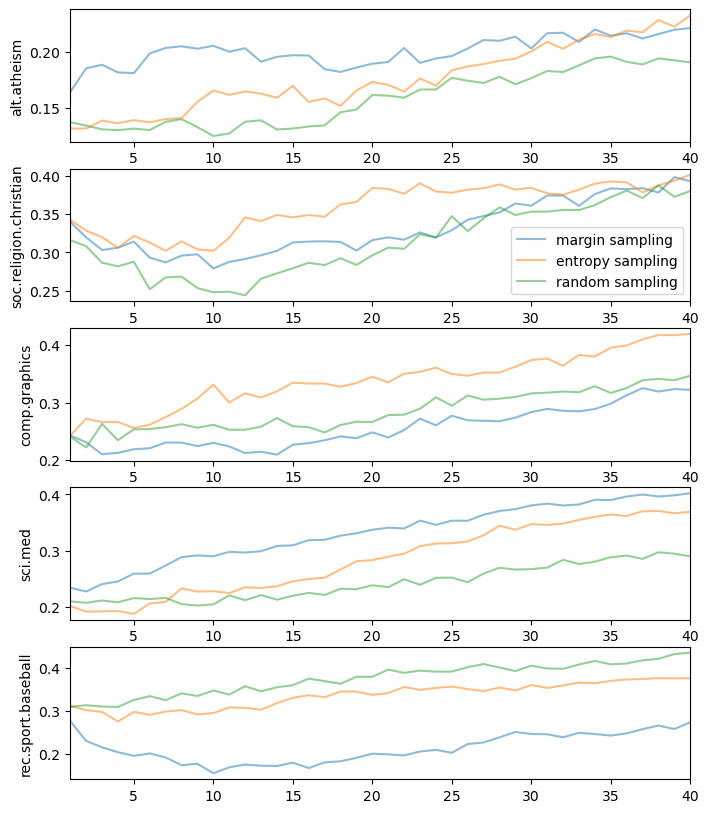

In [12]:
plt.rcParams["figure.figsize"] = (8, 10)
x_queries = np.arange(1, n_queries+1)
f1, ax = plt.subplots(5, 1, gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

methods = [margin_inclass,  entropy_inclass, random_inclass]
method_names = ["margin sampling", "entropy sampling", "random sampling",]

for cat in np.arange(5):
    idx = 0
    for method in methods:
        ax[cat].plot(x_queries, method[:,:, cat].mean(axis=0), label=method_names[idx], alpha=0.5)
        idx+=1
    
    ax[cat].set_ylabel(categories[cat])
    ax[cat].set_xlim(1, n_queries)

ax[1].legend()
plt.savefig('foo1.png', dpi=400)


# -------------------------------------------------

Loading All Data

In [13]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med', 'rec.sport.baseball']
             #             'comp.graphics', 'sci.med', 

mydata_train = fetch_20newsgroups(subset='train', shuffle=True, categories=categories, 
                                  remove = ('headers', 'footers', 'quotes'), random_state=42)

mydata_test = fetch_20newsgroups(subset='test', shuffle=True, categories=categories, 
                                  remove = ('headers', 'footers', 'quotes'), random_state=42)

print('size of training set: %s' % (len(mydata_train ['data'])))
print('size of validation set: %s' % (len(mydata_test['data'])))
print('classes: %s' % (mydata_train.target_names))

import pandas as pd
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})

X = mydata_train.data
y = mydata_train.target

import numpy as np
n_per_cat = 4
np.random.seed(777)

initial_idx = []
for cat in range(5):
    initial_idx.append(mydata_train_df[mydata_train_df.target==cat][0:n_per_cat].index) 

initial_idx = [item for sublist in initial_idx for item in sublist]
X_train = [X[i] for i in initial_idx]
y_train = [y[i] for i in initial_idx]




size of training set: 2854
size of validation set: 1899
classes: ['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.med', 'soc.religion.christian']


In [14]:
mydata_train_df.head(10)

,data,target
0,I know that there is MSG sensitivity. When I ...,3
1,"Okay, this is a long shot.\n\nMy friend Robin ...",3
2,"\nWhile we're on the multipurpose subject, le...",2
3,\netc. ...\n\n\nDyer is beyond rude. \n\nThere...,3
4,"Lowenstein is NOT Jewish. However, there is a...",2
5,[deletions]\n\nIf this is grounded firmly in I...,0
6,\n\n\n\n\n\nIf I remember correctly (Which is ...,2
7,"has no\nmitigate\nliterature,\n\nFirst, let me...",3
8,Excerpts from netnews.alt.atheism: 15-Apr-93 R...,0
9,\nWhy? Do you expect him to remain the best s...,2


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
full_data_model = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier(random_state=777))])
full_data_model.fit(X, y).score(X, y)

0.9810791871058164

In [17]:
predicted = full_data_model.predict(X=X)
print(metrics.classification_report(mydata_train.target, predicted, target_names=mydata_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       1.00      0.97      0.99       480
         comp.graphics       1.00      0.97      0.99       584
    rec.sport.baseball       0.92      1.00      0.96       597
               sci.med       1.00      0.97      0.99       594
soc.religion.christian       1.00      0.98      0.99       599

              accuracy                           0.98      2854
             macro avg       0.98      0.98      0.98      2854
          weighted avg       0.98      0.98      0.98      2854



In [18]:
text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())])
text_clf.fit(X_train, y_train).score(X, y)

0.2785564120532586

In [19]:
predicted = text_clf.predict(X=X)
print(metrics.classification_report(mydata_train.target, predicted, target_names=mydata_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.23      0.19      0.21       480
         comp.graphics       0.27      0.58      0.37       584
    rec.sport.baseball       0.37      0.34      0.35       597
               sci.med       0.29      0.08      0.13       594
soc.religion.christian       0.24      0.19      0.21       599

              accuracy                           0.28      2854
             macro avg       0.28      0.28      0.25      2854
          weighted avg       0.28      0.28      0.26      2854



In [22]:
ini_acc = []
for i in np.arange(100):
        text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())])
        prediction = text_clf.fit(X_train, y_train).predict(X=X)
        precision_recall = metrics.precision_recall_fscore_support(y, prediction)
        ini_acc.append(precision_recall[2])

In [26]:
np.array(ini_acc).mean(axis=0)

array([0.15397849, 0.35656408, 0.26435456, 0.21984668, 0.30547776])